In [2]:
import pandas as pd
import numpy as np

In [6]:
# 담당자별_판매량_Andy사원.xlsx 불러와서 작업
df = pd.read_excel("/Users/cash/Desktop/To_FullStack/lecture/데청캠_동국대/수업/처리:분석/15/담당자별_판매량_Andy사원.xlsx")
df

,제품명,담당자,지역,1분기,2분기,3분기,4분기
0,시계,A,가,198,123,120,137
1,구두,A,가,273,241,296,217
2,핸드백,A,가,385,316,355,331


In [7]:
# 제품명은 '벨트', '담당자'는 'A', '지역'은 '가', '1분기' 100, '2분기' 150, '3분기' 200, '4분기' 250 추가
df.loc[3] = ['벨트', 'A', ' 가', 100, 150, 200, 250]
df

,제품명,담당자,지역,1분기,2분기,3분기,4분기
0,시계,A,가,198,123,120,137
1,구두,A,가,273,241,296,217
2,핸드백,A,가,385,316,355,331
3,벨트,A,가,100,150,200,250


In [8]:
# 담당자를 A에서 Andy로 수정하기
df['담당자'] = 'Andy'
df

,제품명,담당자,지역,1분기,2분기,3분기,4분기
0,시계,Andy,가,198,123,120,137
1,구두,Andy,가,273,241,296,217
2,핸드백,Andy,가,385,316,355,331
3,벨트,Andy,가,100,150,200,250


In [9]:
# 담당자별_판매량_Andy사원_new.xlsx로 저장
import glob
excel_file_name = '담당자별_판매량_Andy사원_new.xlsx'
new_excel_file = pd.ExcelWriter(excel_file_name, engine = 'xlsxwriter')
df.to_excel(new_excel_file, index = False)
new_excel_file.save()

glob.glob(excel_file_name)

['담당자별_판매량_Andy사원_new.xlsx']

In [10]:
df1 = pd.read_excel('/Users/cash/Desktop/To_FullStack/lecture/데청캠_동국대/수업/처리:분석/15/담당자별_판매량_Becky사원.xlsx')
df1

,제품명,담당자,지역,1분기,2분기,3분기,4분기
0,시계,B,나,154,108,155,114
1,구두,B,나,200,223,213,202
2,핸드백,B,나,350,340,377,392


In [11]:
# '담당자'를 B에서 Becky로 수정
df1['담당자'] = 'Becky'
df1

,제품명,담당자,지역,1분기,2분기,3분기,4분기
0,시계,Becky,나,154,108,155,114
1,구두,Becky,나,200,223,213,202
2,핸드백,Becky,나,350,340,377,392


In [12]:
df2 = pd.read_excel('/Users/cash/Desktop/To_FullStack/lecture/데청캠_동국대/수업/처리:분석/15/담당자별_판매량_Chris사원.xlsx')
df2

,제품명,담당자,지역,1분기,2분기,3분기,4분기
0,시계,C,다,168,102,149,174
1,구두,C,다,231,279,277,292
2,핸드백,C,다,365,383,308,323


In [13]:
df2['담당자'] = 'Chris'
df2

,제품명,담당자,지역,1분기,2분기,3분기,4분기
0,시계,Chris,다,168,102,149,174
1,구두,Chris,다,231,279,277,292
2,핸드백,Chris,다,365,383,308,323


In [14]:
#담당자를 수정한 3개의 표를 합치시오.
new_df = df.append(df1, ignore_index = True)
new_df = new_df.append(df2, ignore_index = True)
new_df

,제품명,담당자,지역,1분기,2분기,3분기,4분기
0,시계,Andy,가,198,123,120,137
1,구두,Andy,가,273,241,296,217
2,핸드백,Andy,가,385,316,355,331
3,벨트,Andy,가,100,150,200,250
4,시계,Becky,나,154,108,155,114
5,구두,Becky,나,200,223,213,202
6,핸드백,Becky,나,350,340,377,392
7,시계,Chris,다,168,102,149,174
8,구두,Chris,다,231,279,277,292
9,핸드백,Chris,다,365,383,308,323


In [15]:
# '총합' 열을 추가하고 '1분기', '2사분기', '3분기', 4분기의 합을 저장
new_df['총합'] = new_df.sum(axis=1)
new_df

,제품명,담당자,지역,1분기,2분기,3분기,4분기,총합
0,시계,Andy,가,198,123,120,137,578
1,구두,Andy,가,273,241,296,217,1027
2,핸드백,Andy,가,385,316,355,331,1387
3,벨트,Andy,가,100,150,200,250,700
4,시계,Becky,나,154,108,155,114,531
5,구두,Becky,나,200,223,213,202,838
6,핸드백,Becky,나,350,340,377,392,1459
7,시계,Chris,다,168,102,149,174,593
8,구두,Chris,다,231,279,277,292,1079
9,핸드백,Chris,다,365,383,308,323,1379


In [16]:
# 담당자 기분으로 총합의 평균을 소수점 2자리까지 나타고 manager_outcome에 저장
manager_outcome = round(new_df.groupby('담당자').mean(), 2)
manager_outcome

,1분기,2분기,3분기,4분기,총합
담당자,,,,,
Andy,239.00,207.50,242.75,233.75,923.00
Becky,234.67,223.67,248.33,236.00,942.67
Chris,254.67,254.67,244.67,263.00,1017.00


In [17]:
# 제품 별 분기별 판매량 합 추출
obj_new = new_df.groupby('제품명').sum()
obj_new.head()

,1분기,2분기,3분기,4분기,총합
제품명,,,,,
구두,704,743,786,711,2944
벨트,100,150,200,250,700
시계,520,333,424,425,1702
핸드백,1100,1039,1040,1046,4225


In [18]:
# 각 분기별 가장 많이 팔린 상품을 찾으시
obj_rank = obj_new[obj_new.rank() == 4]
obj_rank

,1분기,2분기,3분기,4분기,총합
제품명,,,,,
구두,NaN,NaN,NaN,NaN,NaN
벨트,NaN,NaN,NaN,NaN,NaN
시계,NaN,NaN,NaN,NaN,NaN
핸드백,1100.0,1039.0,1040.0,1046.0,4225.0


In [19]:
obj_rank.loc[obj_rank['1분기'].notnull(),:]

,1분기,2분기,3분기,4분기,총합
제품명,,,,,
핸드백,1100.0,1039.0,1040.0,1046.0,4225.0


In [22]:
# 각 분기별 가장 높은 판매량을 낸 담당자를 찾으시오
new_rank = new_df.rank(ascending = False) == 1
new_rank

,제품명,담당자,지역,1분기,2분기,3분기,4분기,총합
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False
6,False,False,False,False,False,True,True,True
7,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False
9,False,False,False,False,True,False,False,False


In [21]:
new_df

,제품명,담당자,지역,1분기,2분기,3분기,4분기,총합
0,시계,Andy,가,198,123,120,137,578
1,구두,Andy,가,273,241,296,217,1027
2,핸드백,Andy,가,385,316,355,331,1387
3,벨트,Andy,가,100,150,200,250,700
4,시계,Becky,나,154,108,155,114,531
5,구두,Becky,나,200,223,213,202,838
6,핸드백,Becky,나,350,340,377,392,1459
7,시계,Chris,다,168,102,149,174,593
8,구두,Chris,다,231,279,277,292,1079
9,핸드백,Chris,다,365,383,308,323,1379


In [23]:
new_df.loc[new_rank['1분기'].notnull(),:]

,제품명,담당자,지역,1분기,2분기,3분기,4분기,총합
0,시계,Andy,가,198,123,120,137,578
1,구두,Andy,가,273,241,296,217,1027
2,핸드백,Andy,가,385,316,355,331,1387
3,벨트,Andy,가,100,150,200,250,700
4,시계,Becky,나,154,108,155,114,531
5,구두,Becky,나,200,223,213,202,838
6,핸드백,Becky,나,350,340,377,392,1459
7,시계,Chris,다,168,102,149,174,593
8,구두,Chris,다,231,279,277,292,1079
9,핸드백,Chris,다,365,383,308,323,1379


In [25]:
manager = new_df.max()
manager

제품명      핸드백
담당자    Chris
지역         다
1분기      385
2분기      383
3분기      377
4분기      392
총합      1459
dtype: object

In [26]:
manager[3:7]

1분기    385
2분기    383
3분기    377
4분기    392
dtype: object

In [28]:
new_df[new_df.iloc[:, 3] == manager[3]]

,제품명,담당자,지역,1분기,2분기,3분기,4분기,총합
2,핸드백,Andy,가,385,316,355,331,1387


In [29]:
new_df[new_df.iloc[:,4] == manager[4]]

,제품명,담당자,지역,1분기,2분기,3분기,4분기,총합
9,핸드백,Chris,다,365,383,308,323,1379


In [31]:
import matplotlib.pyplot as plt

In [32]:
x = np.arange(-4.5, 5,0.5)
y = 2 * x**2
[x,y]

[array([-4.5, -4. , -3.5, -3. , -2.5, -2. , -1.5, -1. , -0.5,  0. ,  0.5,
         1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5]),
 array([40.5, 32. , 24.5, 18. , 12.5,  8. ,  4.5,  2. ,  0.5,  0. ,  0.5,
         2. ,  4.5,  8. , 12.5, 18. , 24.5, 32. , 40.5])]

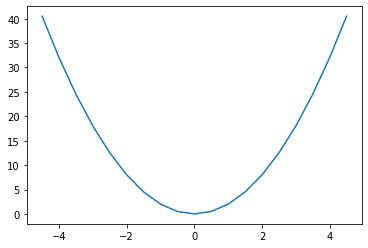

In [33]:
plt.plot(x,y)
plt.show()

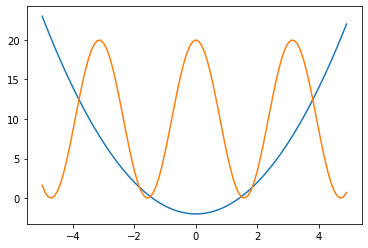

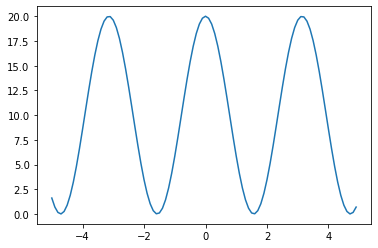

In [36]:
x=np.arange(-5,5,0.1)
y1 = x**2 -2
y2= 20*np.cos(x)**2

plt.figure(1)
plt.plot(x, y1)

plt.figure(2)
plt.plot(x,y2)

plt.figure(1)
plt.plot(x,y2)

plt.show()

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/Users/cash/Desktop/To_FullStack/lecture/데청캠_동국대/수업/처리:분석/15/anime_stock_returns.csv', encoding = "utf-8")
df.head()

,Date,TOEI ANIMATION,IG Port
0,2015-01-01,1.000000,1.000000
1,2015-01-02,1.000000,1.000000
2,2015-01-05,1.011695,1.014082
3,2015-01-06,1.001463,1.000000
4,2015-01-07,0.982457,1.000824


In [ ]:
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.

<Figure size 720x360 with 0 Axes>

/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 46321 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 46973 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 47456 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 45380 missing from c

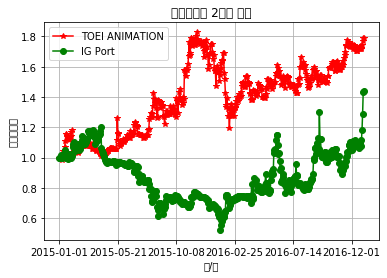

In [43]:
# 그래프 크기 가고 10인치, 5인치
plt.figure(figsize = (10, 5))
anime_plot = df.plot(x='Date', y=['TOEI ANIMATION', 'IG Port'], grid=True,
       style=['r-*', 'g-o'])
anime_plot.set_title('주가등락률 2년간 추이')
anime_plot.set_ylabel('주가등락률')
anime_plot.set_xlabel('년/월')
anime_plot.legend()

In [44]:
plt.savefig('save_fig.png', dpi = 200)

<Figure size 432x288 with 0 Axes>

In [45]:
anime = pd.read_csv('/Users/cash/Desktop/To_FullStack/lecture/데청캠_동국대/수업/처리:분석/15/anime_master.csv', encoding= 'utf-8', index_col='anime_id')

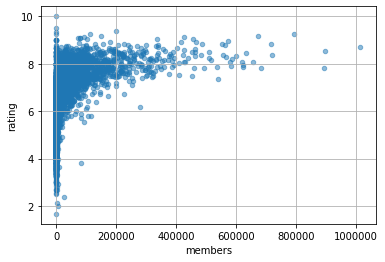

In [46]:
anime.plot.scatter(x='members', y='rating', grid =True, alpha=0.5)

In [47]:
anime.loc[anime['members']>=800000,['name', 'rating', 'members']]

,name,rating,members
anime_id,,,
1535,Death Note,8.71,1013917
16498,Shingeki no Kyojin,8.54,896229
11757,Sword Art Online,7.83,893100


In [49]:
anime.loc[(anime['members']>=600000)&(anime['rating']>=8.5), ['name','rating','members']]

,name,rating,members
anime_id,,,
5114,Fullmetal Alchemist: Brotherhood,9.26,793665
9253,Steins;Gate,9.17,673572
1575,Code Geass: Hangyaku no Lelouch,8.83,715151
1535,Death Note,8.71,1013917
16498,Shingeki no Kyojin,8.54,896229


In [50]:
anime['type'].unique()

array(['Movie', 'TV', 'OVA', 'Special', 'Music', 'ONA'], dtype=object)